Saving winequality-white.csv to winequality-white (7).csv
PCA後のXのサイズ: (4898, 11)


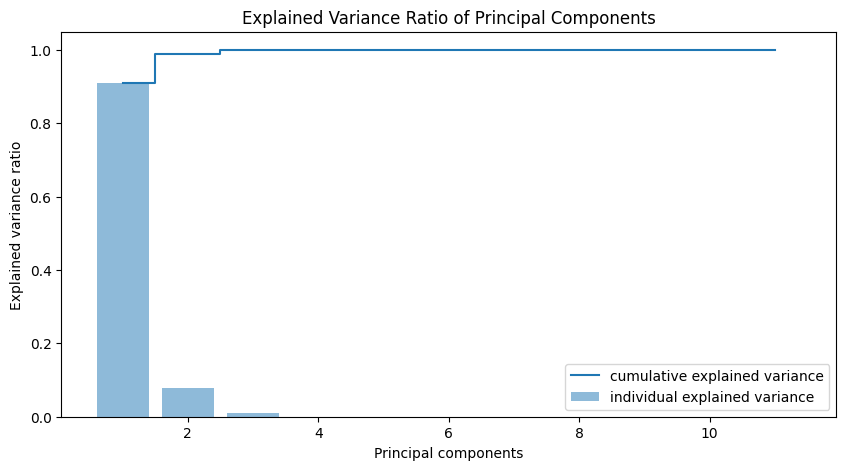

                           PC1       PC2
fixed acidity         0.001544 -0.009163
volatile acidity      0.000169 -0.001545
citric acid           0.000339  0.000140
residual sugar        0.047328  0.014943
chlorides             0.000098 -0.000072
free sulfur dioxide   0.261877  0.964685
total sulfur dioxide  0.963858 -0.262737
density               0.000036 -0.000018
pH                    0.000003 -0.000042
sulphates             0.000341 -0.000361
alcohol              -0.012504  0.006455


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import files

# ファイルをアップロード
uploaded = files.upload()

# アップロードされたファイル名を取得
file_name = next(iter(uploaded))

# CSVファイルをデータフレームとして読み込む
wine_data = pd.read_csv(file_name, delimiter=';')  # デリミタがセミコロンで区切られている場合

# 特徴量を抽出
X = wine_data.iloc[:, :-1].values  # 最後の列を除くすべての列
# 分類ラベルを抽出（ここでは品質スコアを使用）
y = wine_data.iloc[:, -1].values  # 最後の列

# データセットの特徴量の数を取得
n_features = X.shape[1]

# PCAを適用して特徴量の数まで次元に変換
pca = PCA(n_components=n_features)
X_pca = pca.fit_transform(X)

# PCA後のデータのサイズを出力
print(f"PCA後のXのサイズ: {X_pca.shape}")

# 寄与率を取得
explained_variance_ratio = pca.explained_variance_ratio_

# 累積寄与率を計算
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 寄与率と累積寄与率をプロット
plt.figure(figsize=(10, 5))
plt.bar(range(1, n_features + 1), explained_variance_ratio, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, n_features + 1), cumulative_explained_variance, where='mid', label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.legend(loc='best')
plt.show()


# CSVファイルをデータフレームとして読み込む
wine_data = pd.read_csv(file_name, delimiter=';')

# 特徴量を抽出
X = wine_data.iloc[:, :-1].values  # 最後の列を除くすべての列
feature_names = wine_data.columns[:-1]

# PCAを適用して2つの主成分に次元を削減
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# PCAの負荷量を取得
loadings = pca.components_

# 主成分ごとの特徴量の寄与をデータフレームとして表示
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=feature_names)
print(loadings_df)
